<a href="https://colab.research.google.com/github/paridhiijain2048/Credit-Card-Fraud-Detection-using-Machine-Learning/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.simplefilter("ignore")
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # Data visualization
import seaborn as sns # Data visualization
from imblearn.over_sampling import SMOTE # Oversampling method
from imblearn.under_sampling import RandomUnderSampler # Undersampling method
from imblearn.pipeline import Pipeline # Resampling pipeline
from sklearn.model_selection import train_test_split # Split data
from sklearn.ensemble import RandomForestClassifier # Random Forest Model
from sklearn.model_selection import GridSearchCV # Finetuning The Model
import joblib # Saving The Model
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score # Model Evaluation

In [2]:
import pandas as pd

data = pd.read_csv('/content/sample_data/creditcard.csv', on_bad_lines='skip')
print("Dataset Loaded Successfully!")
print(data.head())


Dataset Loaded Successfully!
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

   

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Exploratory Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45646 entries, 0 to 45645
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    45646 non-null  int64  
 1   V1      45646 non-null  float64
 2   V2      45646 non-null  float64
 3   V3      45646 non-null  float64
 4   V4      45646 non-null  float64
 5   V5      45646 non-null  float64
 6   V6      45645 non-null  float64
 7   V7      45645 non-null  float64
 8   V8      45645 non-null  float64
 9   V9      45645 non-null  float64
 10  V10     45645 non-null  float64
 11  V11     45645 non-null  float64
 12  V12     45645 non-null  float64
 13  V13     45645 non-null  float64
 14  V14     45645 non-null  float64
 15  V15     45645 non-null  float64
 16  V16     45645 non-null  float64
 17  V17     45645 non-null  float64
 18  V18     45645 non-null  float64
 19  V19     45645 non-null  float64
 20  V20     45645 non-null  float64
 21  V21     45645 non-null  float64
 22

In [5]:
data.shape

(45646, 31)

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,45646.000000,45646.000000,45646.000000,45646.000000,45646.000000,45646.000000,45645.000000,45645.000000,45645.000000,45645.000000,...,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000,45645.000000
mean,27545.441331,-0.237544,0.028942,0.696718,0.191505,-0.248407,0.098588,-0.117937,0.053331,0.157893,...,-0.027098,-0.108684,-0.039060,0.009358,0.136697,0.022305,0.005524,0.004641,90.829574,0.003111
std,12907.770469,1.886548,1.613070,1.530553,1.403936,1.414608,1.308548,1.282818,1.210502,1.222268,...,0.733323,0.636670,0.572037,0.592176,0.437824,0.502716,0.389241,0.338798,240.298594,0.055690
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,19891.000000,-0.985248,-0.543868,0.222804,-0.714566,-0.853436,-0.638480,-0.600071,-0.148358,-0.589301,...,-0.232743,-0.529609,-0.179136,-0.322003,-0.128065,-0.329709,-0.063670,-0.006837,7.580000,0.000000
50%,32447.000000,-0.246259,0.088873,0.801638,0.191835,-0.280620,-0.155353,-0.073143,0.054815,0.038334,...,-0.070241,-0.083448,-0.051304,0.062230,0.175771,-0.067778,0.008425,0.021814,24.990000,0.000000
75%,37571.750000,1.157412,0.739723,1.434911,1.070924,0.287608,0.487645,0.429944,0.324345,0.859738,...,0.105614,0.303459,0.077905,0.401392,0.421857,0.302819,0.084017,0.076209,82.600000,0.000000
max,42437.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,7879.420000,1.000000


In [7]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,1
V7,1
V8,1
V9,1


In [8]:

# Load dataset
#data = pd.read_csv("creditcard.csv")
# Check if 'Class' column exists
if 'Class' in data.columns:
    fraud = data[data['Class'] == 1]
    valid = data[data['Class'] == 0]

    # Avoid division by zero
    if len(valid) > 0:
        outlierFraction = len(fraud) / float(len(valid))
    else:
        outlierFraction = 0  # Handle edge case

    print(outlierFraction)
    print(f'Fraud Cases: {len(fraud)}')
    print(f'Valid Transactions: {len(valid)}')
else:
    print("Error: 'Class' column not found in dataset")


0.003120673362195899
Fraud Cases: 142
Valid Transactions: 45503


In [9]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


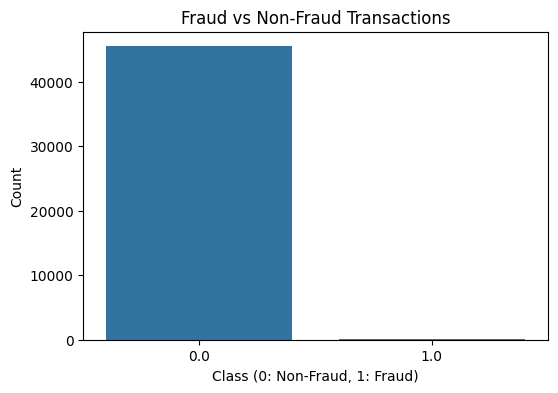

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Class')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

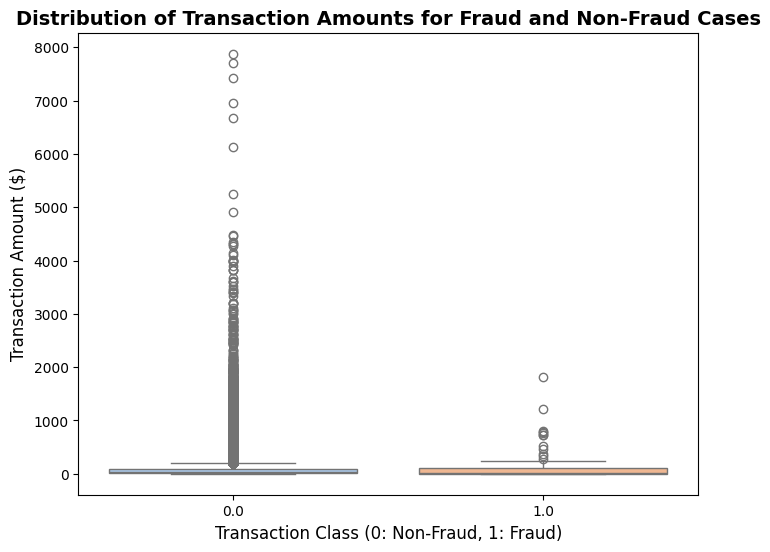

In [11]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Class'], y=data['Amount'], palette='pastel')
plt.title('Distribution of Transaction Amounts for Fraud and Non-Fraud Cases', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Class (0: Non-Fraud, 1: Fraud)', fontsize=12)
plt.ylabel('Transaction Amount ($)', fontsize=12)

# Display the plot
plt.show()

Data pre-processing

In [12]:
print(fraud.shape)
print(valid.shape)

(142, 31)
(45503, 31)


In [13]:
fraud.Amount.describe()


,Amount
count,142.000000
mean,97.592183
std,233.185192
min,0.000000
25%,1.000000
50%,8.370000
75%,99.990000
max,1809.680000


In [ ]:
valid.Amount.describe()

,Amount
count,156261.000000
mean,88.141631
std,246.319779
min,0.000000
25%,5.900000
50%,22.080000
75%,77.980000
max,19656.530000


Mean for fraudulent transaction is more than that of valid.

In [14]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

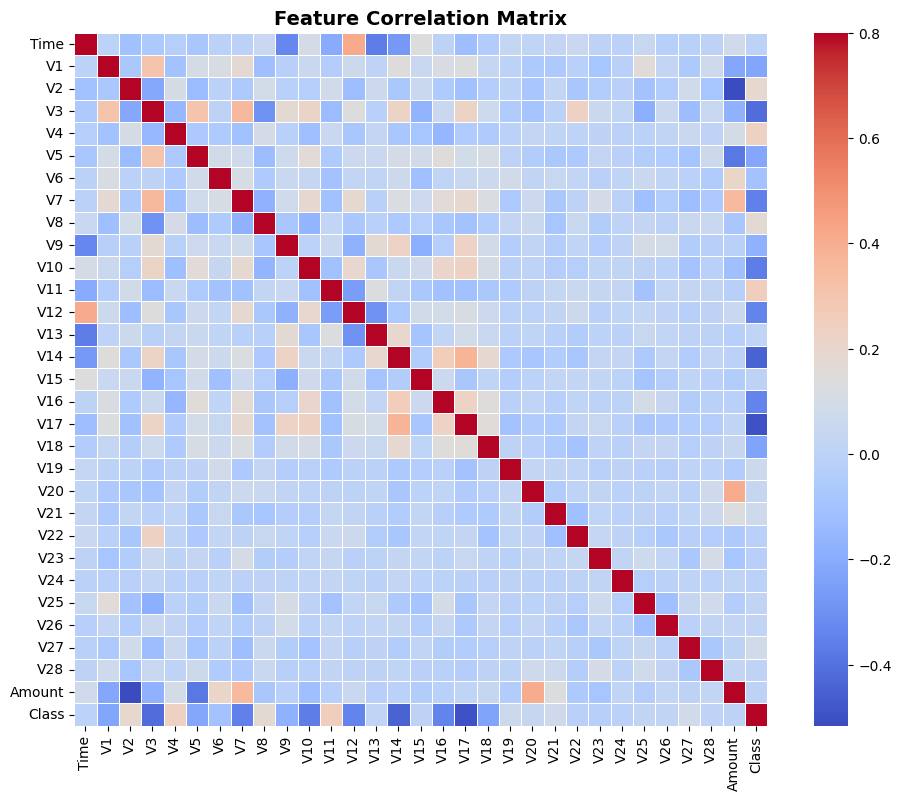

Correlation with Target Variable (Class):
Class     1.000000
V11       0.252337
V4        0.233830
V2        0.193251
V8        0.177593
V27       0.084770
V21       0.070517
V19       0.063464
V20       0.034696
V26       0.015730
V25       0.015441
V13       0.011002
V28       0.004972
Amount    0.001572
V15       0.000662
Time     -0.005849
V24      -0.008423
V22      -0.012412
V23      -0.025486
V6       -0.103070
V9       -0.174055
V5       -0.221692
V1       -0.226062
V18      -0.231034
V12      -0.343063
V16      -0.345591
V7       -0.354988
V10      -0.365220
V3       -0.414939
V14      -0.444689
V17      -0.498560
Name: Class, dtype: float64


In [15]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert non-numeric to NaN
correlation_matrix = data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, square=True, vmax=0.8)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.show()
corr_with_target = correlation_matrix['Class'].sort_values(ascending=False)
print("Correlation with Target Variable (Class):")
print(corr_with_target)


In [16]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,27549.332857,-0.21371,0.011525,0.732168,0.173212,-0.230885,0.106122,-0.092498,0.041321,0.169777,...,0.046284,-0.029987,-0.108242,-0.038246,0.009637,0.136319,0.021863,0.003681,0.004547,90.808470
1.0,26193.556338,-7.87188,5.609155,-10.671851,6.067972,-5.862266,-2.315720,-8.269674,3.901566,-3.650345,...,0.486666,0.898581,-0.250143,-0.300033,-0.079930,0.257712,0.163858,0.596174,0.034797,97.592183


# Feature Engineering
Objective: Create new features or transform existing ones to improve model performance.
Why It’s Important:
New features can help the model better understand patterns in the data.
Transforming skewed features (e.g., Amount) can make the data more suitable for modeling.
Interaction features can capture relationships between variables.
1. Time-Based Features

* Objective: Extract meaningful time-related features from the Time column.
* Steps:
  * Hour of the Day: Divide Time by 3600 (seconds in an hour) and take modulo 24 to get the hour of the day.

  * Day of the Week: Divide Time by 86400 (seconds in a day) and take modulo 7 to get the day of the week.

  * Is Weekend?: Create a binary feature indicating whether the transaction occurred on a weekend (Saturday or Sunday).

* Insights:
These features can help identify if fraudulent transactions cluster around specific times or days.

In [17]:
data["Hour"]=((data["Time"] // 3600) % 24).astype("int")
data["DayOfWeek"]=((data['Time'] // 86400) % 7).astype("int")
data["IsWeekend"]=(data['DayOfWeek'].apply(lambda x: 1 if x in [5, 6] else 0)).astype("int")


## Amount Based Features
* Objective: Transform the Amount feature to reduce skewness and create meaningful categories.
* Steps:
  * Log Transformation: Apply a log transformation to Amount to reduce skewness.
  * Amount Bins: Bin Amount into categories (e.g., Small, Medium, Large, Very Large) using pd.cut().
* Insights:
The log transformation reduces the skewness of Amount, making it more suitable for modeling.
Binning Amount into categories can help the model capture non-linear relationships.

In [18]:
# Apply log transformation to Amount
data["LogAmount"]=np.log(data["Amount"]+1) # Add 1 to avoid log(0)

# Bin Amount into categories (Small, Medium, Large, Very Large)
data['AmountBin'] =(pd.cut(data['Amount'],
                         bins=[-0.1, 100, 1000, 10000, 100000],
                         labels=['Small', 'Medium', 'Large', 'Very Large']))

## Interaction Feautures:
* Objective: Create interaction features to capture relationships between Time and Amount.
* Steps:
  * Hour_Amount_Interaction: Multiply Hour and Amount to create an interaction feature.
* Insights:
Interaction features can help the model capture complex relationships between variables.

For example, fraudulent transactions may occur more frequently at certain times with specific amounts.

In [19]:
# Create interaction feature between Hour and Amount
data["Hour_Amount_Interaction"]=data["Hour"] * data["Amount"]
# Display the first few rows of the dataset with the new features
data[['Time', 'Hour', 'DayOfWeek',
    'IsWeekend', 'Amount', 'LogAmount',
    'AmountBin', 'Hour_Amount_Interaction']].head()

,Time,Hour,DayOfWeek,IsWeekend,Amount,LogAmount,AmountBin,Hour_Amount_Interaction
0,0,0,0,0,149.62,5.014760,Medium,0.0
1,0,0,0,0,2.69,1.305626,Small,0.0
2,1,0,0,0,378.66,5.939276,Medium,0.0
3,1,0,0,0,123.50,4.824306,Medium,0.0
4,2,0,0,0,69.99,4.262539,Small,0.0


In [20]:
# Perform one-hot encoding on the 'AmountBin' column
data = pd.get_dummies(data, columns=['AmountBin'], drop_first=True)

# Handling Class Imbalance¶
Objective: Balance the dataset using a combination of SMOTE (oversampling) and Random Undersampling.

Why It’s Important:
The dataset is highly imbalanced, with fraudulent transactions making up less than 1% of the data.
Resampling helps the model learn the patterns of the minority class.

Steps:
* Split the dataset into training and testing sets.
* Apply SMOTE to oversample the minority class.
* Apply Random Undersampling to reduce the majority class.
* Verify the resampled data.

1. Splitting dataset

In [21]:
# Split the data into features (X) and target (y)

X=data.drop(columns="Class")
y=data["Class"]
X=X.fillna(0)
y=y.fillna(0)
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
# Check the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print(y.isna().sum())
print(X.isna().sum()) # Count missing values in y
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
print(X.isna().sum())

Training set shape: (36516, 38) (36516,)
Testing set shape: (9130, 38) (9130,)
0
Time                       0
V1                         0
V2                         0
V3                         0
V4                         0
V5                         0
V6                         0
V7                         0
V8                         0
V9                         0
V10                        0
V11                        0
V12                        0
V13                        0
V14                        0
V15                        0
V16                        0
V17                        0
V18                        0
V19                        0
V20                        0
V21                        0
V22                        0
V23                        0
V24                        0
V25                        0
V26                        0
V27                        0
V28                        0
Amount                     0
Hour                       0
DayOfWeek           

In [22]:
data = data.dropna(subset=["Class"])  # Removes rows where 'Class' is NaN
data["Class"].fillna(0, inplace=True)  # Replaces NaN with 0
print(y.isna().sum())


0


2.Applying SMOTE

In [23]:
smote=SMOTE(sampling_strategy=0.5,random_state=42)
data.loc[:, "V28"] = data["V28"].fillna(0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#Check the class distribution after SMOTE
print(f"Class distribution after SMOTE: \n{y_train_smote.value_counts()} ")

Class distribution after SMOTE: 
Class
0.0    36402
1.0    18201
Name: count, dtype: int64 


3.Random Undersampling

In [24]:
# Define RandomUnderSampler for undersampling the majority class
under=RandomUnderSampler(sampling_strategy=1.0,random_state=42)

# Apply Random Undersampling to the SMOTE-resampled data
X_train_resampled,y_train_resampled=under.fit_resample(X_train_smote,y_train_smote)

# Check the class distribution after Random Undersampling
print(f"Class distribution after SMOTE: \n{y_train_resampled.value_counts()} ")

Class distribution after SMOTE: 
Class
0.0    18201
1.0    18201
Name: count, dtype: int64 


Verify Undersampled data

In [25]:
# Check class distribution before and after resampling
print(f"Before Resampling:\n{y_train.value_counts()}")

print(f"After Resampling:\n{y_train_resampled.value_counts()}")

Before Resampling:
Class
0.0    36402
1.0      114
Name: count, dtype: int64
After Resampling:
Class
0.0    18201
1.0    18201
Name: count, dtype: int64


Random Forest Classifier
* Objective: Train and evaluate a Random Forest model to detect fraudulent transactions.
* Why It’s Important:
  * Random Forest is a robust and interpretable model that performs well on imbalanced datasets.
  * It provides feature importance, which helps identify the key drivers of fraud.
* Steps:


1.   Fine-tune the Random Forest model using GridSearchCV.
2.   Train the final model with the best hyperparameters.
3.   Evaluate the model on the test set.
4.   Extract feature importance.
5.   Save the model for future use.


1.Hyperparamter tuning



In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the reduced parameter grid
param_dist = {
    'n_estimators': [100, 150],   # Avoid very high values to reduce runtime
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV for efficiency
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=4,  # Number of random samples (lower = faster, higher = better tuning)
    cv=2,      # Reduce cross-validation folds to speed up training
    scoring="f1",
    n_jobs=-1,  # Use all available CPU cores
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV on the resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best F1-Score:", best_score)


Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'max_depth': None, 'class_weight': 'balanced'}
Best F1-Score: 0.9995332129454194


Train final random forest model


In [27]:
# Initialize the Random Forest model with the best parameters
final_rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    class_weight=best_params['class_weight']
)

# Train the final model on the resampled training data
final_rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', n_estimators=150,
                       random_state=42)

Evaluate the final model

Final Random Forest - Confusion Matrix:
[[9093    9]
 [   2   26]]


Text(50.72222222222221, 0.5, 'True Label')

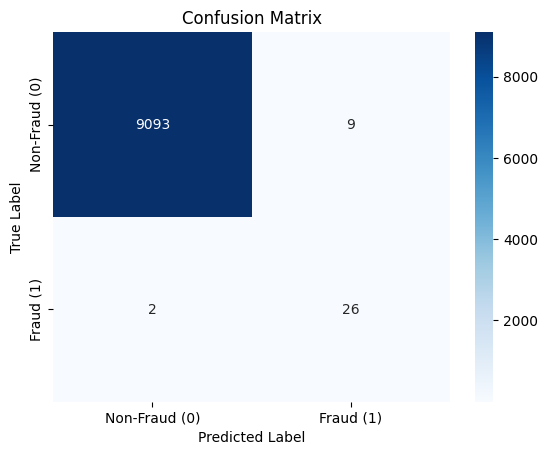

In [28]:
# Make predictions on the test set
y_pred_final = final_rf_model.predict(X_test)

# Evaluate the final model
print("Final Random Forest - Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred_final)
print(cm)
sns.heatmap(cm,
            cmap="Blues",
            fmt='d',
            annot=True,
           xticklabels=['Non-Fraud (0)', 'Fraud (1)'],
            yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

Model Evaluation: Classification Report and Metrics

In [29]:
print("\nFinal Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_final))

# Calculate precision, recall, and F1-score for the minority class (Class 1)
precision_final = precision_score(y_test, y_pred_final, pos_label=1)
recall_final = recall_score(y_test, y_pred_final, pos_label=1)
f1_final = f1_score(y_test, y_pred_final, pos_label=1)

print(f"Final Random Forest - Precision: {precision_final:.4f}")
print(f"Final Random Forest - Recall: {recall_final:.4f}")
print(f"Final Random Forest - F1-Score: {f1_final:.4f}")



Final Random Forest - Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9102
         1.0       0.74      0.93      0.83        28

    accuracy                           1.00      9130
   macro avg       0.87      0.96      0.91      9130
weighted avg       1.00      1.00      1.00      9130

Final Random Forest - Precision: 0.7429
Final Random Forest - Recall: 0.9286
Final Random Forest - F1-Score: 0.8254


Save the features

In [30]:
# Get feature importances
importances = final_rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': importances
})

# Sort the DataFrame by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importance_df.head(10))

   Feature  Importance
14     V14    0.187839
12     V12    0.142934
10     V10    0.133492
3       V3    0.109966
11     V11    0.090906
4       V4    0.080661
17     V17    0.061434
2       V2    0.032746
16     V16    0.026638
9       V9    0.026063


Save the final Model

In [31]:
# Save the final Random Forest model
joblib.dump(final_rf_model, 'final_fraud_detection_model.pkl')

['final_fraud_detection_model.pkl']

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss'),  # Removed outdated `use_label_encoder`
    "SVM": SVC()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_resampled, y_train_resampled)  # Ensure these variables exist

    # Predictions
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # Print results
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Print summary of results
print("\nModel Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")



Training Logistic Regression...
Logistic Regression Accuracy: 0.9888
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      9102
         1.0       0.21      0.93      0.34        28

    accuracy                           0.99      9130
   macro avg       0.60      0.96      0.67      9130
weighted avg       1.00      0.99      0.99      9130


Training Random Forest...
Random Forest Accuracy: 0.9988
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9102
         1.0       0.74      0.93      0.83        28

    accuracy                           1.00      9130
   macro avg       0.87      0.96      0.91      9130
weighted avg       1.00      1.00      1.00      9130


Training XGBoost...
XGBoost Accuracy: 0.9989
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9102
         1.0       0.78      0.89      0.83        28

    accu